In [114]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)

import torch
import torch.nn as nn
import torch.functional as F

In [115]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)

import torch
import torch.nn as nn
xs = [0 for i in range(hex.SIZE)]
ys = [0 for i in range(hex.SIZE)]

for _ in range(500):
    game = hex.HexGame()
            
    model = random_model.RandModel()
    tree = mcts.MCTS(game, model)
    (x, y) = tree.run(10)
    xs[x] += 1
    ys[y] += 1
print(xs)
print(ys)

[149, 180, 171]
[173, 152, 175]


In [175]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import torch
import torch.nn as nn

game = hex.HexGame()

for i in range(0, hex.SIZE-1):
    for j in range(1, 3):
        game.place_piece(i, j)   
        game.take_turn()    

print(game) 
model = random_model.RandModel()
tree = mcts.MCTS(game, model)

(x, y) = tree.run(100)
print(x, y)
game.place_piece(x, y)
print(game)
print(game.check_winner())
game.take_turn()

. x o 
 . x o 
  . . . 

2 1
. x o 
 . x o 
  . x . 

(0, [(0, 1), (1, 1), (2, 1)])


In [384]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import torch
import torch.nn as nn

game = hex.HexGame()

for i in range(0, hex.SIZE-1):
    for j in range(1, 3):
        game.place_piece(j, i+j%2)   
        game.take_turn()    

print(game) 
model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
tree = mcts.MCTS(game, model)
(x, y) = tree.run(1000)
tree.visualize()
print(x, y)
game.place_piece(x, y)
print(game)
print(game.check_winner())
game.take_turn()

. . . 
 . x x 
  o o . 

2 2
. . . 
 . x x 
  o o x 

(None, [])


In [117]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)

game = hex.HexGame()
board, player = game.board, game.current_player
mask = game.get_moves()
tensor = preprocess_data.embed_board(board, player)
net = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
net(tensor.unsqueeze(dim=0), mask)

(tensor([[-0.0288]], grad_fn=<TanhBackward0>),
 tensor([[0.1293, 0.1065, 0.1061],
         [0.1143, 0.1079, 0.1082],
         [0.1095, 0.1102, 0.1080]], grad_fn=<ViewBackward0>))

In [189]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)

SelfGame = self_play.SelfPlay(agent_)
data = SelfGame.generate_data(1, 0.9)
len(data)


Outcome:  0


4

In [123]:
data[0]

(tensor([[[0., 1., 1.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [1., 1., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]),
 tensor([[0.0303, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0606],
         [0.0808, 0.8182, 0.0101]]),
 tensor(1.))

In [210]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

train_loader, val_loader = preprocess_data.get_loaders(data, batch_size=8, shuffle=True)

In [381]:
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

SelfGame = self_play.SelfPlay(agent_)
data = SelfGame.generate_data(10, 1, shuffle=True)
print(f"len(data): {len(data)}")

100%|██████████| 10/10 [02:06<00:00, 12.64s/it]

len(data): 163


[1]/[50]: Training Loss: 3.949821127785577 - MSE Loss: 0.8487802081637912 - CE Loss: 3.101040893130832
[1]/[50]: Validation Loss: 2.17859275413282 - Val MSE Loss: 0.5777208908940806 - Val CE Loss: 1.6008718663995916
[2]/[50]: Training Loss: 3.1320157051086426 - MSE Loss: 0.3714432153436873 - CE Loss: 2.760572486453586
[2]/[50]: Validation Loss: 2.165186943429889 - Val MSE Loss: 0.5657583551651171 - Val CE Loss: 1.5994285995310003
[3]/[50]: Training Loss: 2.929676718182034 - MSE Loss: 0.38827244606282973 - CE Loss: 2.541404273774889
[3]/[50]: Validation Loss: 2.194839611197963 - Val MSE Loss: 0.6013784898721938 - Val CE Loss: 1.593461123379794
[4]/[50]: Training Loss: 3.0126074949900308 - MSE Loss: 0.41392722891436684 - CE Loss: 2.5986803107791476
[4]/[50]: Validation Loss: 2.2614345153172812 - Val MSE Loss: 0.6670512779001552 - Val CE Loss: 1.5943832469708992
[5]/[50]: Training Loss: 2.827735291586982 - MSE Loss: 0.36827971537907916 - CE Loss: 2.459455543094211
[5]/[50]: Validation Los

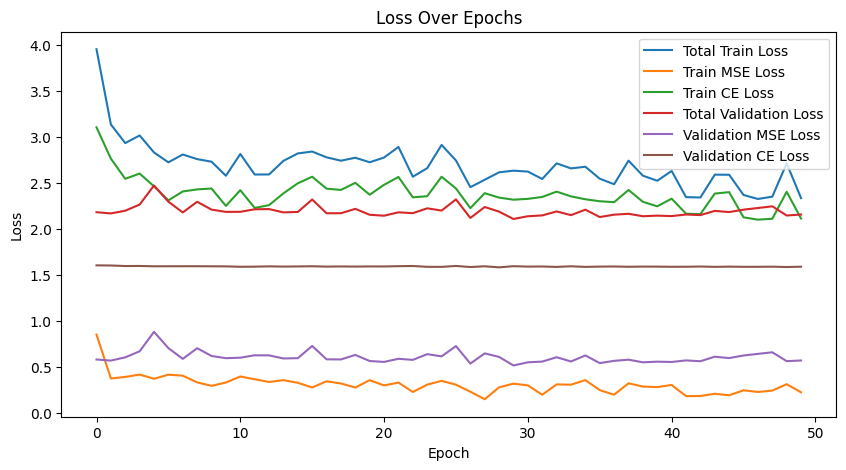

In [417]:
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)
agent_.train(data, 50, 0.001, 4)

In [338]:
eval_data = random.choices(data, k=10)
model.eval()
for d in eval_data:
    print(d[-1])
    print(model(d[0].unsqueeze(dim=0), d[1].unsqueeze(dim=0))[0])
model.train();

tensor(1.)
tensor([[1.]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[1.]], grad_fn=<TanhBackward0>)
tensor(0.)
tensor([[0.0098]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[1.]], grad_fn=<TanhBackward0>)
tensor(0.)
tensor([[0.0050]], grad_fn=<TanhBackward0>)
tensor(0.)
tensor([[0.0099]], grad_fn=<TanhBackward0>)
tensor(0.)
tensor([[0.0050]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[1.]], grad_fn=<TanhBackward0>)
tensor(0.)
tensor([[0.0088]], grad_fn=<TanhBackward0>)
tensor(0.)
tensor([[0.0121]], grad_fn=<TanhBackward0>)
